

# **ĐỀ BÀI: sử dụng ngôn ngữ Python và google colab để làm những yêu cầu sau**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.function_base import average
from sklearn.linear_model import LinearRegression

## **Câu 1**


In [2]:
# Đọc và hiển thị các thông tin từ file vnstock_listing_companies.csv
data = pd.read_csv("/content/vnstock_listing_companies.csv")
print(data)

     ticker exchange                     shortName  \
0       CMV     HOSE          Thương nghiệp Cà Mau   
1       COM     HOSE               Vật tư Xăng dầu   
2       DHT      HNX              Dược phẩm Hà Tây   
3       DGW     HOSE                   Thế Giới Số   
4       TTH      HNX           TM và DV Tiến Thành   
...     ...      ...                           ...   
1150    VAV    UPCOM                        VIWACO   
1151    VPD     HOSE  Phát triển Điện lực Việt Nam   
1152    NTH      HNX          Thủy điện Nước Trong   
1153    PPT    UPCOM                   Petro Times   
1154    TOW    UPCOM      Cấp nước Trà Nóc - Ô Môn   

                           industry industryEn  establishedYear  noEmployees  \
0                            Bán lẻ     Retail           1980.0        666.0   
1                            Bán lẻ     Retail           2000.0          0.0   
2                            Bán lẻ     Retail           2001.0        795.0   
3                            Bá

In [3]:
#In ra danh sách các cột
print('In danh sách các cột',data.columns)
#In ra số dòng dữ liệu của bảng
print('In ra số dòng dữ liệu của bảng: ',len(data))

In danh sách các cột Index(['ticker', 'exchange', 'shortName', 'industry', 'industryEn',
       'establishedYear', 'noEmployees', 'noShareholders', 'foreignPercent',
       'website', 'stockRating', 'outstandingShare', 'issueShare',
       'companyType', 'monthlyRecords'],
      dtype='object')
In ra số dòng dữ liệu của bảng:  1155


## **Câu 2**
Viết hàm find_stock để tìm mã số cổ phiếu

In [5]:
#Hàm find_stock để tìm mã cổ phiếu theo mã số sinh viên
def find_stock(mssv):
    #Lấy 4 số cuối của mã số sinh viên
    mssv_last_4_digits = int(mssv[-4:])
    #Chia lấy phần nguyên của mã số sinh viên
    stt = mssv_last_4_digits // 10
    #Sử dụng iloc để lấy mã cổ phiếu tương ứng
    ma_cp = data.iloc[stt]['ticker']
    return ma_cp

In [6]:
# Nhập mã số sinh viên và in ra mã cổ phiếu tương ứng dựa theo cách tính của hàm find_stock
mssv = '030237210108'
ma_cp1 = find_stock(mssv)
print("Mã cổ phiếu được chọn là:", ma_cp1)

Mã cổ phiếu được chọn là: ABS


## **Câu 3**
 Hiển thị thông tin tương ứng của cổ phiếu ABS từ file vnstock_listing_companies.csv. Các thông tin cần hiển thị bao gồm: ticker, shortName, monthlyRecords

In [26]:
#Lấy thông tin của cổ phiếu từ Data
tt_cp = data[data['ticker'] == ma_cp1]
#In ra thông tin ticker, shortName, monthlyRecords
print('Thông tin cổ phiếu %s: '%ma_cp1)
# In tiêu đề các cột với {'Ticker':<15}: Chuỗi "Ticker" được in ra với chiều rộng tối thiểu là 15 ký tự, tương tự
print(f"{'Ticker':<15}{'Short Name':<30}{'Monthly Records':<25}")
# In thông tin từng dòng dùng vòng lặp for
#row['ticker']:<15: mã số cổ phiếu sẽ được in ra với chiều rộng 15 ký tự, tương tự
for index, row in tt_cp.iterrows():
    print(f"{row['ticker']:<15}{row['shortName']:<30}{str(row['monthlyRecords']):<25}") #str(row['monthlyRecords']): Dữ liệu monthlyRecords được chuyển thành chuỗi


Thông tin cổ phiếu ABS: 
Ticker         Short Name                    Monthly Records          
ABS            DV Nông nghiệp Bình Thuận     ABS.csv                  


## **Câu 4**
Thực hiện thống kê số lượng giao dịch, giá Close trung bình, giá Close cao nhất, giá Close thấp
nhất của cổ phiếu ABS trong khoảng thời gian từ tháng 8 đến tháng 9 năm 2023.

In [28]:
#Đọc dữ liệu các thông tin từ file
data_cp = pd.read_csv('/content/ABS.csv')
# Định dạng cột time dạng datetime
data_cp['time'] = pd.to_datetime(data_cp['time'])
data_cp.set_index('time', inplace = True)
#Lọc dữ liệu trong khảng từ 1 tháng 8 đến 30 tháng 9 năm 2023
data_t8_t9 = data_cp['2023-08-01':'2023-09-30']
#In ra thống kê số lượng giao dịch, giá Close trung bình, giá Close cao nhất, giá close thấp nhất
print('Thống kê số lượng giao dịch tháng 8-9/2023: ', len(data_t8_t9))
print('Giá Close trung bình: ', data_t8_t9['close'].mean())
print('Giá Close cao nhất: ', data_t8_t9['close'].max())
print('Giá Close thấp nhất: ', data_t8_t9['close'].min())

Thống kê số lượng giao dịch tháng 8-9/2023:  42
Giá Close trung bình:  7577.142857142857
Giá Close cao nhất:  8780
Giá Close thấp nhất:  6190


## **Câu 5**
Từ lịch sử giao dịch trên, thêm cột (Info01) cho biết giá Close mỗi ngày là lớn hơn (giá trị 1), nhỏ
hơn (giá trị -1), bằng (giá trị 0), so với giá Open của ngày đó.

In [29]:
#Tạo cột Info01
data_t8_t9['Info01'] = np.where(data_t8_t9['close'] > data_t8_t9['open'], 1, np.where(data_t8_t9['close'] < data_t8_t9['open'], -1, 0))

<ipython-input-29-0cb61c893e9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t8_t9['Info01'] = np.where(data_t8_t9['close'] > data_t8_t9['open'], 1, np.where(data_t8_t9['close'] < data_t8_t9['open'], -1, 0))


## **Câu 6**
Từ lịch sử giao dịch trên, tạo thêm cột (Info02) cho biết giá Close mỗi ngày giao dịch là tăng (giá
trị 1), giảm (giá trị -1), bằng (giá trị 0), so với giá Close ngày trước đó. Lưu tất cả thông tin (bao gồm
cả Info01 và Info02) ra file {ABS}_Stock.csv.

In [30]:
# Tạo cột Info02
data_t8_t9['Info02'] = np.where(data_t8_t9['close'] > data_t8_t9['close'].shift(1), 1, np.where(data_t8_t9['close'] < data_t8_t9['close'].shift(1), -1, 0))


<ipython-input-30-88558f60ba7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t8_t9['Info02'] = np.where(data_t8_t9['close'] > data_t8_t9['close'].shift(1), 1, np.where(data_t8_t9['close'] < data_t8_t9['close'].shift(1), -1, 0))


In [31]:
print(data_t8_t9)

            open  high   low  close   volume ticker  Info01  Info02
time                                                               
2023-08-01  8700  8700  8200   8330  3438800    ABS      -1       0
2023-08-02  8310  8350  8109   8310  2125500    ABS       0      -1
2023-08-03  8360  8560  8270   8400  2256000    ABS       1       1
2023-08-04  8500  8700  8400   8500  2689000    ABS       0       1
2023-08-07  8650  8890  8550   8750  2898400    ABS       1       1
2023-08-08  8750  8900  8640   8780  2801800    ABS       1       1
2023-08-09  8780  8880  8660   8760  2639900    ABS      -1      -1
2023-08-10  8760  8780  8400   8400  4270200    ABS      -1      -1
2023-08-11  8400  8400  8060   8250  2853200    ABS      -1      -1
2023-08-14  8200  8410  8200   8310  1715000    ABS       1       1
2023-08-15  8350  8490  8350   8380  1306900    ABS       1       1
2023-08-16  8360  8400  8200   8260  1605900    ABS      -1      -1
2023-08-17  8260  8290  7950   7950  3034000    

In [32]:
#Lưu tất cả thông tin ra File BTT_Stock.csv
data_t8_t9.to_csv(f'ABS_Stock.csv', index=False)

## **Câu 7**
Từ file ABS_Stock.csv trên, vẽ các đường [Open, High, Low, Close] của cổ phiếu ABS.

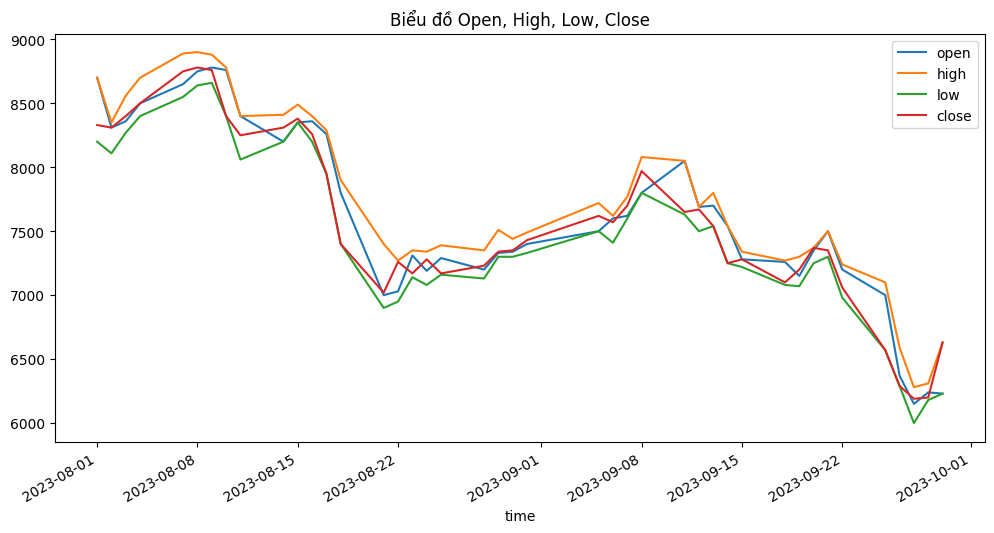

In [33]:
# Vẽ đường open, high, low, close
data_t8_t9[['open', 'high', 'low', 'close']].plot(figsize=(12, 6))
plt.title('Biểu đồ Open, High, Low, Close')
plt.show()

## **Câu 8**
Từ file ABS_Stock.csv trên, vẽ các biểu đồ dạng cột chứa thông tin Volume của cổ phiếu ABS.


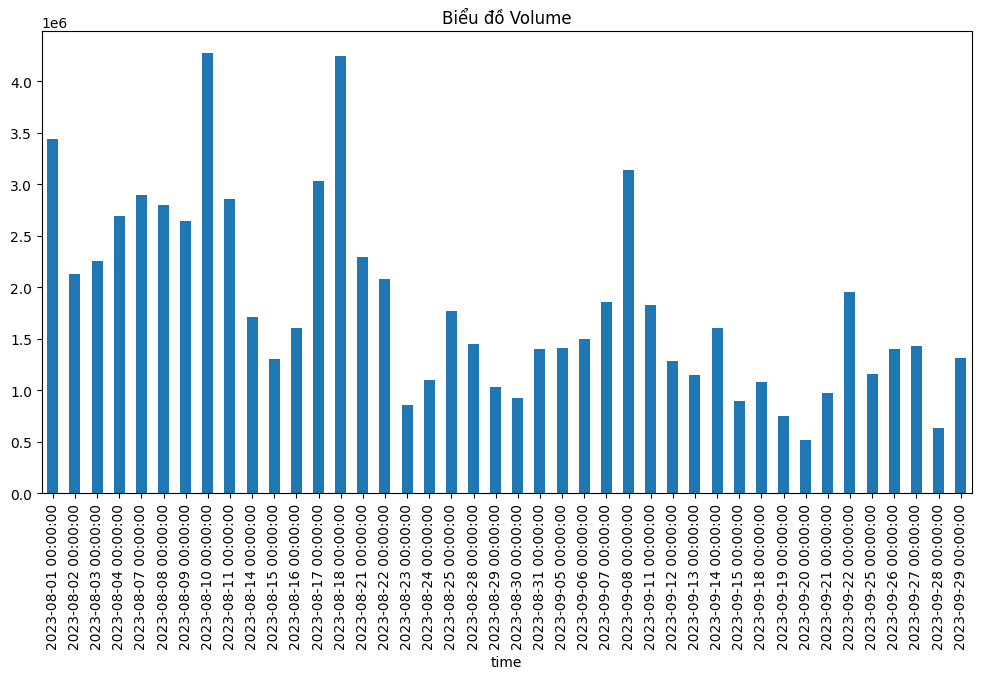

In [34]:
# Vẽ biểu đồ cột Volume
data_t8_t9['volume'].plot(kind='bar', figsize=(12, 6))
plt.title('Biểu đồ Volume')
plt.show()

## **Câu 9**
Từ file ABS_Stock.csv trên, xây dựng mô hình hồi quy tuyến tính diễn tả sự phụ thuộc của giá
Close với Volume của cổ phiếu ABS.

Error (MSE): 330814.0619707108
R-squared (R2): 0.15999121457585042
Hệ số hồi quy: [0.00050598]
Hệ số chặn: 6684.090017063396


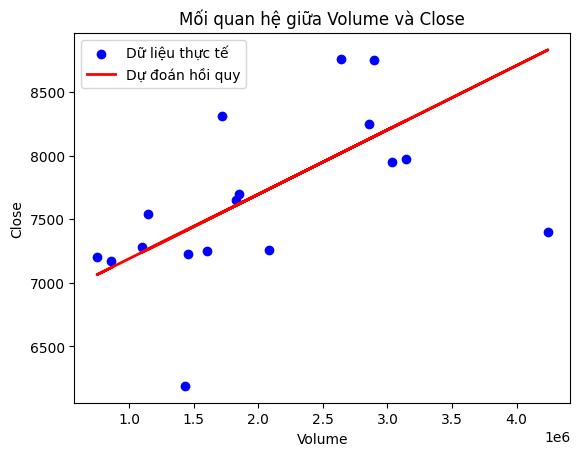

In [40]:
# Câu 9
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = data_t8_t9[['volume']]
y = data_t8_t9['close']
#model = LinearRegression()
#model.fit(X, y)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Đánh giá mô hình
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán độ chính xác
mse = mean_squared_error(y_test, y_pred) #MSE: sai số trung bình bình phương
r2 = r2_score(y_test, y_pred)

print(f'Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Hệ số hồi quy
print('Hệ số hồi quy:', model.coef_)
print('Hệ số chặn:', model.intercept_) # hệ số chặn là giá trị dự đoán của Close khi Volume bằng 0

# Vẽ biểu đồ thể hiện mối quan hệ giữa Volume và Close
plt.scatter(X_test, y_test, color='blue', label='Dữ liệu thực tế')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Dự đoán hồi quy')
plt.title('Mối quan hệ giữa Volume và Close')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.legend()
plt.show()


Dựa vào kết quả trên ta thấy giá trị MSE là 330814.061970, cho thấy sai số trung bình bình phương giữa giá trị dự đoán và giá trị thực tế là khá lớn. Giá trị R² là 0.1599, cho thấy mô hình chỉ giải thích được khoảng 15.99% sự biến động của giá Close dựa trên Volume. Đây là một giá trị khá thấp, cho thấy Volume không phải là yếu tố chính ảnh hưởng đến giá Close của cổ phiếu ABS.
Mô hình này không phải là mô hình tốt

## **Câu 10**
Dựa vào mô hình vừa xây dựng ở bước trên, nhập 10 giá trị Volume bất kì và đưa ra dự đoán
giá Close tương ứng.

In [41]:
# Câu 10
volumes_to_predict = [1111, 2222, 3333, 4444, 5555, 6666, 7575, 2345, 8888, 10000]
predicted_closes = model.predict(np.array(volumes_to_predict).reshape(-1, 1))
print("Dự đoán giá Close tương ứng với các giá trị Volume:", predicted_closes)

Dự đoán giá Close tương ứng với các giá trị Volume: [6684.65215885 6685.21430063 6685.77644241 6686.3385842  6686.90072598
 6687.46286776 6687.92280195 6685.27653595 6688.58715133 6689.14979909]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
